In [29]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

df = pd.read_csv(r"./Airplane_Crashes_and_Fatalities_Since_1908.csv")

# print(df.dtypes, '\n')
# print(df.shape, '\n')

X = df.iloc[:, :13]  # Features (first 13 columns)
y = df.iloc[:, 13]   # Target (14th column)

print("\nFeatures shape:", X.shape)
print("Target shape:", y.shape, '\n')

print(df.columns)


Features shape: (5268, 13)
Target shape: (5268,) 

Index(['index', 'Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route',
       'Type', 'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground',
       'Summary'],
      dtype='object')


We should delete a null values from Fatalities or Aboard to ensure we're working with a dataset that's clean.

In [35]:
print(df.isnull().sum())  # Shows the number of missing values per column


index              0
Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1707
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64


KeyError: 'Year'

In [27]:
df_cleaned = df.dropna(subset=['Fatalities','Aboard'])

My first instinct was to plot crashes per year to explore trends in event-based data. Since airplane crashes are rare yet impactful, I wanted to identify any anomalies compared to expected patterns—such as a generally low crash count in early years. This could be due to incomplete records before modern safety organizations standardized crash reporting. Additionally, the rise of passenger flights over time likely contributed to higher crash counts in later years.

int32


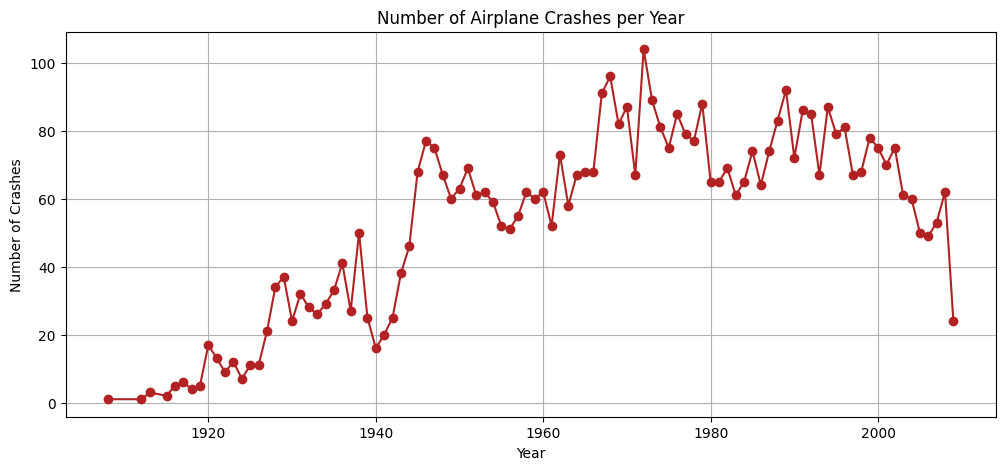

In [36]:
df_cleaned = df.dropna(subset=['Date', 'Location', 'Operator', 'Fatalities', 'Aboard']).copy()
df_cleaned['Year'] = pd.to_datetime(df_cleaned['Date']).dt.year
print(df_cleaned['Year'].dtype)

df_cleaned['Year'].value_counts().sort_index().plot(kind='line', marker='o', figsize=(12,5), title="Number of Airplane Crashes per Year", color = "firebrick")
plt.xlabel("Year")
plt.ylabel("Number of Crashes")
plt.grid(True)
plt.show()